## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [167]:
#Load dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
bomgross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bomgross.head()#head to make sure it works

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [100]:
bomgross.shape #get a feel for the dataset

(3387, 5)

In [101]:
bomgross.title.unique() #to make sure no movie is double counted and the data set is clean
len(bomgross)

3387

In [102]:
bomgross.year.unique() #working with 9 years of data

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [103]:
bomgross.year.value_counts(ascending = False) #how many movies are in each year

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

In [104]:
bomgross.isna().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [105]:
#we want to check null values. We can see a lot in foreign gross, lets investigate.
bomgross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [106]:
#make sure all values in the column foreign gross are floats
bomgross['foreign_gross'] = bomgross.foreign_gross.astype(str).str.strip()
bomgross.foreign_gross = bomgross.foreign_gross.str.replace(',','')
bomgross.foreign_gross = bomgross.foreign_gross.astype(float)
bomgross.foreign_gross.dtype

dtype('float64')

In [108]:
bomgross.shape

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [111]:
#fill the null values with zeros
bomgross['foreign_gross'].fillna(value = 0, inplace = True)
bomgross['domestic_gross'].fillna(value = 0, inplace = True)
bomgross.head(1000)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
995,Damsels in Distress,SPC,1000000.0,0.0,2012
996,Rampart,MNE,973000.0,0.0,2012
997,Elles,KL,158000.0,754000.0,2012
998,W.E.,Wein.,583000.0,285000.0,2012


In [295]:
bomgross.shape #great now are dataset is cleaned up

(3387, 5)

In [296]:
len(bomgross.studio)

3387

In [312]:

bomgross.foreign_gross = bomgross.foreign_gross.str.replace(',','')
bomgross.foreign_gross = bomgross.foreign_gross.astype(float)
bomgross['total_gross'] = bomgross['domestic_gross'] + bomgross['foreign_gross']

In [440]:
#Now we want to investigate whether its a good time to get into the movie industry space
yearly_gross = bomgross.groupby('year')['total_gross'].mean()
yearly_gross

year
2010    79370582.84
2011    87910404.45
2012   113995264.18
2013   135695464.48
2014   115831843.15
2015   136311712.15
2016   155474388.01
2017   172009606.81
2018   163230345.48
Name: total_gross, dtype: float64

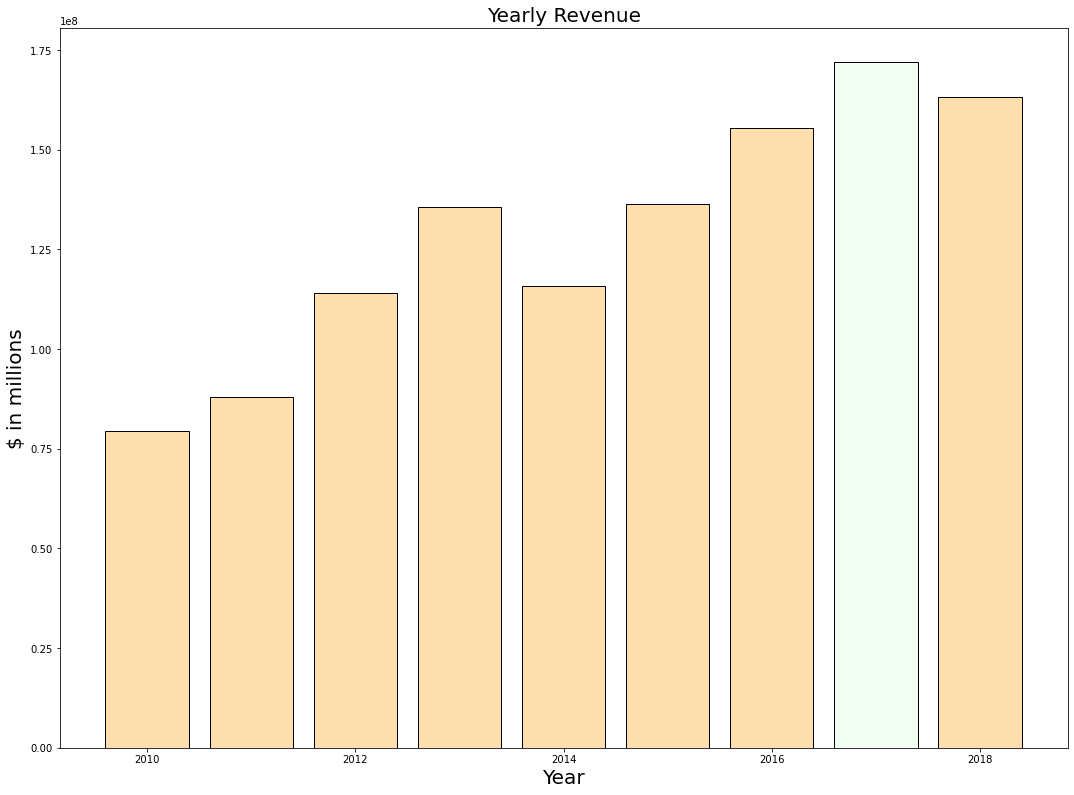

In [450]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
barlist = ax.bar(yearly_gross.index,yearly_gross, color = 'navajowhite', edgecolor = 'black')
barlist[7].set_color('honeydew')
barlist[7].set_edgecolor('black')
x = plt.xlabel('Year', fontsize = 20)

y = plt.ylabel('$ in millions', fontsize = 20)
y.FontSize = 20
plt.title('Yearly Revenue'.title(), fontsize = 20)
plt.show()
#2017 was the best year for movies

In [ ]:
#NEW DATASET

When is the best time to release a movie?

In [201]:
movies = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [321]:
gross = ['production_budget', 'domestic_gross', 'worldwide_gross']
for x in gross:
    movies[x] = movies[x].str.replace('$','').str.replace(',','').astype(int)
movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [329]:
movies.release_date.str[:3].unique() #getting all 12 months
movies['month'] = movies.release_date.str[:3]

In [326]:
movies['total_gross'] = movies['domestic_gross'] + movies['worldwide_gross']
movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,3536852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,1286727750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,192524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1862019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,1936903129


In [370]:
best_month = movies.groupby('month')[['worldwide_gross','domestic_gross','total_gross']].mean().sort_values(by = 'total_gross', ascending = True)
best_month.sort_values(by = 'total_gross', ascending = False)

,worldwide_gross,domestic_gross,total_gross
month,,,
May,162268003.97,66697948.59,228965952.56
Jun,142523030.60,65827914.35,208350944.95
Jul,140963614.67,60728039.63,201691654.30
Nov,135741626.90,58181172.82,193922799.72
Dec,101693170.68,46100816.01,147793986.68
Mar,80633371.13,38572985.95,119206357.08
Feb,71544525.82,35414652.87,106959178.69
Aug,60978411.05,32168205.38,93146616.43
Apr,59920258.57,27328398.53,87248657.10


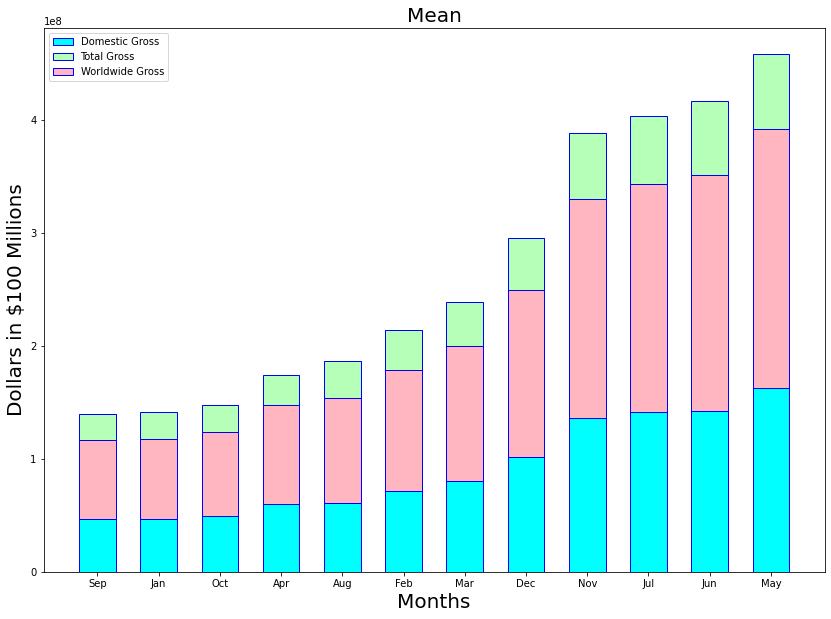

In [451]:
fig, ax = plt.subplots(figsize = (14,10))

ax.bar(x = best_month.index, height = best_month['worldwide_gross'], label = 'Domestic Gross', width = .6,
      color = 'cyan', edgecolor = 'blue')

ax.bar(x = best_month.index, height = best_month['total_gross'], color = '#b5ffb9', edgecolor = 'blue',
       label = 'Total Gross', bottom = best_month['total_gross'], width = .6)

ax.bar(x = best_month.index, height = best_month['total_gross'], color = 'lightpink', edgecolor = 'blue',
       label = 'Worldwide Gross', bottom = best_month['worldwide_gross'], width = .6)


x = ax.set_title('Mean', fontsize = 20)
ax.legend()

y = ax.set_ylabel('Dollars in $100 Millions', fontsize = 20)
z = ax.set_xlabel('Months', fontsize = 20)
plt.show()

In [452]:
#an average movie costs 70-90 million dollars to make but for the sake of our dataset we are slightly adjusting these numbers
movies['budget'] = movies['production_budget'].apply(lambda x: 'low budget' if x < 10000000 else ('average budget' if 10000001 < x < 90000000 else 'high budget'))
movies['budget'].value_counts(normalize = True)

average budget   0.53
low budget       0.35
high budget      0.12
Name: budget, dtype: float64

In [419]:
#Profit of each movie
movies['Profit'] = (movies['total_gross'] - movies['production_budget'])
movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross,month,budget_level,Return_on_investment,REturn on Investment,Return on Investment,Profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,3536852904,Dec,high budget,3111852904,3536852903.88,35368529.04,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,1286727750,May,high budget,876127750,1286727749.68,12867277.50,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,192524700,Jun,high budget,-157475300,192524698.18,1925246.98,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1862019831,May,high budget,1531419831,1862019830.82,18620198.31,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,1936903129,Dec,high budget,1619903129,1936903128.84,19369031.29,1619903129


In [427]:
budget_profit = movies.groupby('budget').mean()[['Profit','total_gross']]
budget_profit.sort_values(by = 'Profit', ascending = False)

,Profit,total_gross
budget,,
high budget,339446286.31,441686690.35
average budget,101781419.83,136133406.29
low budget,20823061.82,24202346.78


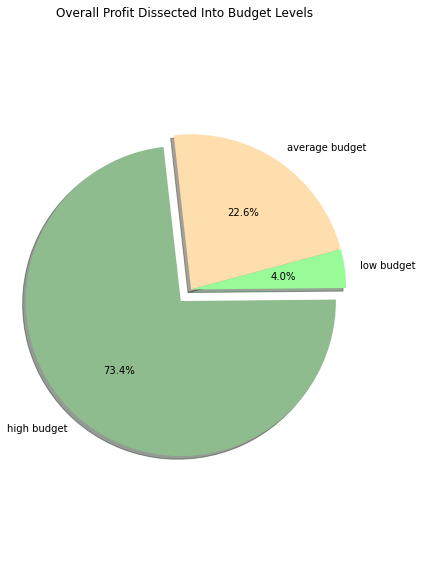

In [442]:
my_colors = ['navajowhite', 'darkseagreen', 'palegreen']
my_explode = (0,0.1,0)
fig = plt.figure(figsize = (14,10))
ax1 = fig.add_subplot(1,2,1)
ax1.pie(budget_profit['total_gross'], labels = budget_profit.index, startangle = 15, shadow = True, colors = my_colors,
       explode = my_explode, autopct='%1.1f%%')
ax1.axis('equal')

ax1.set_title('Overall Profit Dissected Into Budget Levels'.title())

plt.show()